In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
data = pd.read_csv('/content/customer_churn.csv')

In [5]:
data.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission\nBarkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019\nCarloshaven, RI ...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court\nAlyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount\nAngelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row\nKarenshire, MH 71730",Love-Jones,1


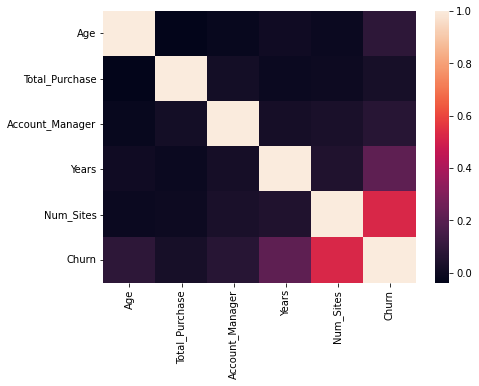

In [6]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr())

In [7]:
# Numerical columns

num_data = data[data.dtypes[data.dtypes != 'O'].index.tolist()]

X = num_data.drop('Churn', axis=1)
y = num_data.Churn.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=94, stratify=y)

In [8]:
# Scale data

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_tr, X_test_tr = scaler.transform(X_train), scaler.transform(X_test)

In [9]:
xgb = XGBClassifier()
xgb.fit(X_train_tr, y_train)
accuracy = xgb.score(X_test_tr, y_test)

In [10]:
accuracy

0.8711111111111111

In [34]:
predictions = xgb.predict(X_test_tr)
results = X_test.reset_index().join(pd.DataFrame({'preds':predictions}))
final = pd.merge(results, data.Company.to_frame(), left_on='index', right_index=True)

In [35]:
final.head()

,index,Age,Total_Purchase,Account_Manager,Years,Num_Sites,preds,Company
0,493,44.0,7736.13,1,4.48,8.0,0,Day LLC
1,688,39.0,9655.42,1,5.50,8.0,0,"Wise, Nichols and Allen"
2,497,50.0,9641.61,0,3.09,5.0,0,King-Atkinson
3,495,50.0,9248.87,0,4.56,9.0,0,"Jacobs, Arnold and Schwartz"
4,514,52.0,6805.48,1,6.05,9.0,0,Butler PLC


In [33]:
# To Power BI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
num_data = dataset[dataset.dtypes[dataset.dtypes != 'O'].index.tolist()]
X = num_data.drop('Churn', axis=1)
y = num_data.Churn.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=94, stratify=y)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_tr, X_test_tr = scaler.transform(X_train), scaler.transform(X_test)
xgb = XGBClassifier()
xgb.fit(X_train_tr, y_train)
accuracy = xgb.score(X_test_tr, y_test)
predictions = xgb.predict(X_test_tr)
results = X_test.reset_index().join(pd.DataFrame({'preds':predictions}))
final = pd.merge(results, dataset.Company.to_frame(), left_on='index', right_index=True)